In [36]:
from locale import normalize
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA

np.random.seed(0)

In [37]:
#############################
# Read .csv and .txt files #
#############################
def read_csv(path = 'co_occur.csv'):
  """
  Reads a .csv file.

  Input:
      - path: Path of the .csv file

  Return:
      - data: A 10,000 x 10,000 numpy array (the covariance matrix)
  """
  
  data = []
  
  with open(path, 'r') as file:
      
    csvreader = csv.reader(file)
    
    for row in csvreader:
      a = []
      
      for el in row:
        a.append(float(el))
        
      a = np.array(a)
      data.append(a)
      
    data = np.array(data)
    print(np.shape(data))
    
  return data


In [38]:
def read_txt(path):
  """
  Reads a .txt file.

  Input:
      - path: Path of the .txt file

  Return:
      - words: A list of strings (i^th item is the i^th row from the file)
  """
    
  with open(path) as f:
     
    data = f.read()
    words = data.split("\n")
  
    print(len(words))
 
  return words

In [39]:
##################################
# Plot Eigenvalues (For Part 1) #
##################################
def plot_evs(D):
  '''
  Input: 
     - D: A sequence of eigenvalues
  
  Plots the eigenvalues against their indices and save
  the figure in 'hw4/ev_plot.png'
  '''
  n = np.shape(D)[0]
  x = range(1, n+1)
  fig, ax = plt.subplots()
  ax.plot(x, D)

  ax.set(xlabel = 'Index', ylabel = 'Eigenvalue')
  fig.savefig("ev_plot.png")
  plt.show()

In [40]:
#################################################################################
# Find the Embedding of a Given Word (e.g. 'man', 'woman') (For Parts 2, 4, 5) #
#################################################################################
def find_embedding(word, words, E):
  '''
  Inputs: 
      - word: The query word (string)
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
  Return:
      - emb: The word embedding
  '''  
  ##################################################################
  # TODO: Implement the following steps:
  # i) Find the index/position of 'word' in 'words'.
  # ii) The row of 'E' at this index will be the embedding 'emb'. 
  ##################################################################
  idx = np.where(words == word)[0][0]
  emb = E[idx, :]
  return emb

In [41]:
############################################################
# Find the Word Most Similar to a Given Word (For Part 2) #
############################################################
def find_most_sim_word(word, words, E): 
  '''
  Inputs:
      - word: The query word (string)
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
  Return:
      - most_sim_word: The word which is most similar to the input 'word'
  '''
  ###############################################################################################################
  # TODO: Implement the following steps: 
  # i) Get the word embedding of 'word' using the 'find_embedding' function. 
  # ii) Compute the similarity (dot product) of this embedding with every embedding, i.e. with each row of 'E'. 
  # iii) Find the index of the row of 'E' which gives the largest similarity, exculding the row which is the
  # embedding of 'word' from the search (for this, you will need to find the index/position of 'word' in 'words'). 
  # iv) Find the word corresponding to that index from 'words'.
  ###############################################################################################################
  emb = find_embedding(word, words, E)
  sims = emb @ E.T
  idx = np.argpartition(sims, -2)[-2]
  most_sim_word = words[idx]
  return most_sim_word

In [42]:
#############################################################
# Interpret Principal Components/Eigenvectors (For Part 3) #
#############################################################
def find_info_ev(v, words, k=20): 
  # Find words corresponding to the 'k' largest magnitude elements of an eigenvector,
  # to see what kind of information is captured by 'v'.
  '''
  Inputs: 
      - v: An eigenvector (with 10,000 entries)
      - words: The list of all words read from dictionary.txt
      - k: The number of words the function should return
  Return:
      - info: The set of k words 
  '''
  #########################################################################################################################
  # TODO: Implement the following steps:
  # i) Obtain a set of indices (postions in 'v') which would sort the entries of 'v' in decreasing order of absolute value.
  # ii) Using the set of first 'k' indices, get the corresponding words from the list 'words'.
  ##########################################################################################################################
  idxs = np.argpartition(np.abs(v), -k)[-k:]
  info = words[idxs]
  return info

In [43]:
#################################################################################
# Explore Semantic/Syntactic Concepts Captured by Word Embeddings (For Part 4) #
#################################################################################

def plot_projections(word_seq, proj_seq, filename = 'projections.png'):
  '''
  Inputs: 
   - word_seq: A sequence of words (strings), used as labels.
   - proj_seq: A sequence of projection values.
   - filename: The plot will be saved 
  
  Plot the set of values in 'proj_seq' on a line with the corresponding labels from 'word_seq and
  save the figure
  '''
  y = np.zeros(len(proj_seq))
  fig, ax = plt.subplots()
  ax.scatter(proj_seq, y)
  
  # to avoid overlaps in the plot
  plt.rcParams.update({'font.size': 9})
  idx = np.argsort(proj_seq)
  proj_seq = proj_seq[idx]
  word_seq = word_seq[idx]
  del_y_prev = 0
  
  for i, label in enumerate(word_seq):
    # to avoid overlaps in the plot
    if i<len(proj_seq)-1:
      if np.abs(proj_seq[i]-proj_seq[i+1])<0.02:
          del_y0 = -0.005-0.0021*len(label)
          if del_y_prev == 0:
            del_y = del_y0
          else:
            del_y = 0
          del_y_prev = del_y0  
      elif (del_y_prev!=0 and del_y == 0 and np.abs(proj_seq[i]-proj_seq[i-1])<0.02):
          del_y = -0.005-0.0021*len(label)
          del_y_prev = del_y
      else:
          del_y = 0
          del_y_prev = 0
          
    ax.text(x = proj_seq[i]-0.01, y = y[i]+0.005+del_y, s = label, rotation = 90)
  
  ax.set_xlim(-0.5,0.5)

  fig.savefig(filename)
  plt.show()  

In [44]:
def get_projections(word_seq, words, E, w):
  '''
  Inputs: 
      - word_seq: A sequence of words (strings)
      - word: The query word (string)
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
      - w: An embedding vector (with 10,000 elements)
  Return:
      - proj_seq: The sequence of projections of the words in 'word_seq'
  '''
  ###############################################################################################################
  # TODO: Implement the following steps: 
  # i) For each word in 'word_seq':
  #     - Get its word embedding using the 'find_embedding' function. 
  #     - Find the projection of this embedding onto 'w', i.e. the dot product with normalized 'w'. 
  # ii) Return the set of projections. 
  ###############################################################################################################
  proj_seq = np.empty(word_seq.shape)  
  for i in range(word_seq.shape[0]):
    word = word_seq[i]
    emb = find_embedding(word, words, E)
    proj_seq[i] = np.dot(emb, w) / np.linalg.norm(w)
  return proj_seq

In [45]:
#####################################################################
# BONUS: Finding Answers to Analogy Questions (For Part 5 (Bonus)) #
#####################################################################
def find_most_sim_word_w(w, words, E, ids):
  # Find the word whose embedding is most similar to a given vector in the embedding space.
  # Similar to the 'find_most_sim_word' function.
  '''
  Inputs: 
      - w: The query vector (with 100 entries) [for an analogy question, this is a combination of three
                            word embeddings (say words wd1, wd2, wd3), as mentioned in the problem statement]
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
      - ids: The indices of words (wd1, wd2, wd3) which need to be excluded from the search while finding the most similar word
  Return:
      - most_sim_word: The word whose embedding which is most similar to the input 'w'
  '''  
  ########################################################################################################################################
  # TODO: Implement the following steps: 
  # i) Compute the similarity (dot product) of 'w' with every embedding, i.e. with each row of 'E'. 
  # ii) Find the index of the row of 'E' which gives the largest similarity, exculding the rows at indices given by 'ids' from the search. 
  # iii) Find the word corresponding to that index from 'words'.
  #########################################################################################################################################
  sims = E @ w
  idxs = np.argpartition(sims, -4)[-4:]
  idx = idxs[-4]
  for i in range(idxs.shape[0]):
    if idxs[i] not in ids and sims[idxs[i]] > sims[idx]:
      idx = idxs[i]
  most_sim_word = words[idx]
  return most_sim_word

In [64]:
def find_analog(wd1, wd2, wd3, words, E):
  '''
  Inputs: 
      - wd1, wd2, wd3: Three words (strings) posing an analogy question (e.g. for the one in the problem statement, 
                                                                      these are 'man', 'woman', 'king')
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
  Return:
      - wd4: The word whose embedding which is most similar to the input 'w'
  '''
  ########################################################################################################################################
  # TODO: Implement the following steps: 
  # i) Find the word embeddings of wd1, wd2 and wd3 using the 'find_embedding' function: w1, w2, w3, respectively.
  # ii) Get vector w = w2 - w1 + w3, and normalize it. 
  # iii) Find the indices/positions of wd1, wd2, wd3 from the list 'words'.
  # iv) Find wd4, the closest word to w (excluding the given three words from the search by using the indices from the previous step), 
  # using the 'find_most_sim_word_w' function. This will be the answer to the analogy question.
  #########################################################################################################################################
  w1 = find_embedding(wd1, words, E)
  w2 = find_embedding(wd2, words, E)
  w3 = find_embedding(wd3, words, E)
  w = (w2 - w1 + w3) / np.linalg.norm(w2 - w1 + w3)

  #print("w1:",w1)  
  #print("w2:",w2)  
  #print("w3:",w3)  
  #print("w:",w)  
    
  idx1 = np.where(words == wd1)[0][0]
  idx2 = np.where(words == wd2)[0][0]
  idx3 = np.where(words == wd3)[0][0]
  wd4 = find_most_sim_word_w(w, words, E, np.array([idx1, idx2, idx3]))
  return wd4

In [65]:
def check_analogy_task_acc(task_words, words, E):
  # Check the accuracy for the analogy task by finding answers to a set of analogy questions #
  '''
  Inputs: 
      - task_words: The list of word sequences (wd1, wd2, wd3, wd4), for an analogy statement (e.g. for 
                     the one in the problem statement, these will be 'man', 'woman', 'king', queen)
      - words: The list of all words read from dictionary.txt
      - E: The embedding matrix (10,000 x 100)
  Returns:
      - acc: The average accuracy for the task
  '''
  f1 = open('correct_pred.txt', 'w')
  f2 = open('incorrect_pred.txt', 'w')
  f1.write('{:>18s} {:>18s} {:>18s} {:>18s} {:>18s}'.format('word1', 'word2', 'word3', 'word4', 'prediction') + '\n')
  f2.write('{:>18s} {:>18s} {:>18s} {:>18s} {:>18s}'.format('word1', 'word2', 'word3', 'word4', 'prediction') + '\n')
  acc = 0
  
  for word_seq in task_words:
    word_seq = word_seq.split()
    wd4_ans = find_analog(word_seq[0], word_seq[1], word_seq[2], words, E)
    if wd4_ans == word_seq[3]:
      f1.write(f'{word_seq[0]:>18} {word_seq[1]:>18} {word_seq[2]:>18} {word_seq[3]:>18} {wd4_ans:>18}\n')
      acc+=1
    else:
      f2.write(f'{word_seq[0]:>18} {word_seq[1]:>18} {word_seq[2]:>18} {word_seq[3]:>18} {wd4_ans:>18}\n')
  acc = acc/len(task_words)
      
  return acc


In [66]:
################################
# Putting Everything Together #
################################

###########################################################################
# Part 0: Read the files (Make sure the filenames and paths are correct) #
###########################################################################
# M: The co-occurrance matrix
# words: The set of all words in 'dictionary.txt'
# task_words: The set of analogy queries from 'analogy_task.txt' (for the BONUS part)
M = read_csv("co_occur.csv")
words = read_txt("dictionary.txt")
words = np.array(words)
task_words = read_txt('analogy_task.txt')


(10000, 10000)
10000
5585


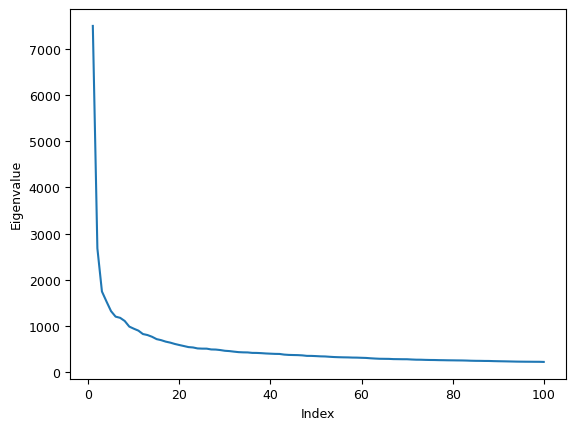

Percent of the variance explained by the first 100 eigenvalues: 0.7566938349826994


In [67]:
###########################################################
# Part 1: Applying PCA to get the low rank approximation #
###########################################################
# TODO:
# i) Apply the log transformation mentioned in the problem statement.
# ii) Get centered M, denoted as Mc. First obtain the (d-dimensional) mean feature vector by averaging across all datapoints (rows).
# Then subtract it from all the n feature vectors.
# iii) Use the PCA function (fit method) from the sklearn library to apply PCA on Mc and get its rank-100 approximation (Go through 
# the documentation available at: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
# iv) Get the set of eigenvalues and obtain the plot using the 'plot_evs' function provided above.
normalized_M = np.log1p(M)
Mc = normalized_M - normalized_M.mean(axis=0)
pca = PCA(n_components=100)
pca.fit(Mc)
plot_evs(pca.singular_values_)
print('Percent of the variance explained by the first 100 eigenvalues:', np.sum(pca.explained_variance_ratio_))

In [68]:
##########################################################
# Part 2: Finding the word most similar to a given word #
##########################################################
# TODO:
# i) Get the set of eigenvectors, i.e. the matrix V (size 10,000 x 100). This will be used in Parts 2, 3.
# Note: Make sure the dimensions are correct (apply transpose, if required).
# ii) Get P = McV. Normalize the columns of P (to have unit l2-norm) to get E. This will be used in Parts 2, 4, 5.
# iii) Normalize the rows of E to have unit l2-norm.
# iv) Complete the 'find_embedding' function and the 'find_most_sim_word' function. 
# v) Pick some word(s), e.g. 'university', uqertyse the 'find_most_sim_word' function to find the most similar word.
V = pca.components_.T
P = Mc @ V
E = P / np.linalg.norm(P, axis=0)
E = E / np.linalg.norm(E, axis=1).reshape((E.shape[0], 1))
print('Most similar word of \'learning\':', find_most_sim_word('learning', words, E))
print('Most similar word of \'university\':', find_most_sim_word('university', words, E))
print('Most similar word of \'california\':', find_most_sim_word('california', words, E))


Most similar word of 'learning': teaching
Most similar word of 'university': college
Most similar word of 'california': florida


In [69]:
#########################################################################################
# Part 3: Looking at the information captured by the principal components/eigenvectors #
#########################################################################################
# TODO:
# i) Complete the 'find_info_ev' function, which finsd the words corresponding to k largest magnitude
# elements of a given eigenvector.
# ii) Choose a set of eigenvectors (i.e. columns) from V.
# iii) For each eigenvector, use the 'find_info_ev' function to see what kind of information it captures. Print the results.
output_info_ev = 'info_ev.txt'
f = open(output_info_ev, 'w')
f.write('Information in eigenvectors(top 10 absolute entries):\n')
for i in range(len(V[0])):
  v = V[:, i]
  f.write(f'{i + 1:3d} {pca.singular_values_[i]:21.16f} [{", ".join(find_info_ev(v, words, 10))}]\n')
des = [(10, 'Military'),
       (27, 'Country'),
       (30, 'Male Name'),
       (47, 'Movie and TV Drama'),
       (72, 'Large Degree')]
for n, d in des:
  print('-'*100)
  print(f'{n}-th eigenvector with {pca.singular_values_[n - 1]} eigenvalue captures info about \'{d}\':')
  print(f'{", ".join(find_info_ev(V[:, n-1], words, 10))}')

----------------------------------------------------------------------------------------------------
10-th eigenvector with 943.9410315110819 eigenvalue captures info about 'Military':
ii, squadron, commander, forces, command, aircraft, russian, german, army, soviet
----------------------------------------------------------------------------------------------------
27-th eigenvector with 495.04581677755306 eigenvalue captures info about 'Country':
dutch, canadian, american, swedish, scottish, italian, german, polish, australian, irish
----------------------------------------------------------------------------------------------------
30-th eigenvector with 466.1537359201319 eigenvalue captures info about 'Male Name':
mike, richard, tom, robert, george, michael, peter, david, william, john
----------------------------------------------------------------------------------------------------
47-th eigenvector with 366.73350681208905 eigenvalue captures info about 'Movie and TV Drama':
acto

[-0.12557495  0.00714369  0.0657002   0.10037724 -0.02503628 -0.05432464
  0.11738617 -0.00142108 -0.12951612 -0.10769263  0.01609821 -0.03797717
 -0.0620949  -0.06971818 -0.09435888  0.02216695 -0.13293321  0.05520869
 -0.01653212 -0.16631894  0.13135343 -0.0099515   0.11840211 -0.02154145
 -0.09446683  0.10795655 -0.11563462  0.00911856  0.07368791  0.04656211
 -0.03599743 -0.1229342  -0.07274986  0.06654111  0.15688141  0.08585752
 -0.05231311  0.05666619  0.25614357 -0.10663209 -0.10999129 -0.25947309
 -0.03322876  0.12791226  0.18738845 -0.04758927  0.05419187  0.0258043
  0.0195417   0.0875691  -0.17224674  0.15243705 -0.10372199 -0.01852051
  0.01108563 -0.03527166  0.14416526  0.02414269  0.01406362 -0.06023368
 -0.09335261  0.04193145 -0.01147566  0.0528175  -0.08862975  0.01046575
  0.03989008  0.04569816 -0.01385815  0.05922667 -0.08065103 -0.2067364
 -0.02569896 -0.11789654 -0.0694221  -0.02012384  0.11075194 -0.19661071
 -0.08058644 -0.23271116 -0.00067161  0.06849915 -0.0

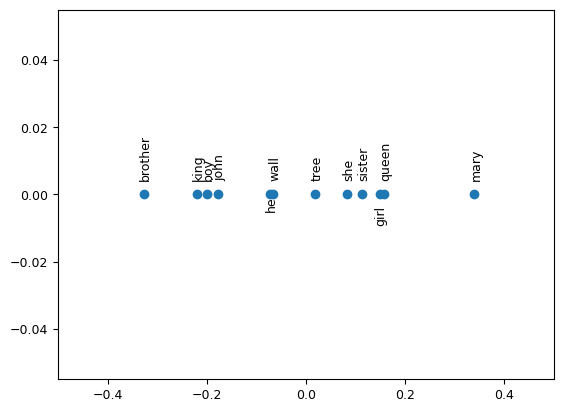

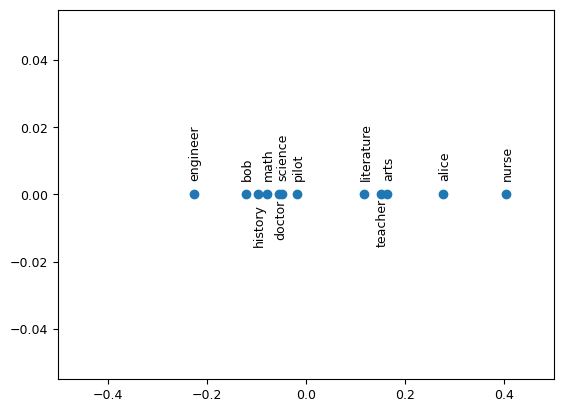

In [70]:
#############################################################################
# Part 4: Exploring Semantic/Syntactic Concepts Captured by Word Embeddings #
##############################################################################
# TODO:
# i) Use the 'find_embedding' function to find w1 and w2 (the embeddings for 'man' and 'woman', respectively). 
# ii) Get w = w1 - w2 and normalize it.
# iii) Complete the 'get_projections' function.
# iv) Use this function to get the set of projections for the list of words mentioned in Part 4.1. 
# Use the 'plot_projections' function to obtain the plot of projections with their corresponding word labels.
# v) Repeat the previous step for the list of words mentioned in Part 4.2 to generate a second plot. You can use the 
# 'filename' argument to make sure the 'plot_projections' function does not overwrite the existing file to save the new plot.
w1 = find_embedding('woman', words, E)
w2 = find_embedding('man', words, E)
w = (w1 - w2) / np.linalg.norm(w1 - w2)
print(w)
# Part 4.1
word_seq = np.array(['boy', 'girl', 'brother', 'sister', 'king', 'queen', 'he', 'she','john', 'mary', 'wall', 'tree'])
proj_seq = get_projections(word_seq, words, E, w)
plot_projections(word_seq, proj_seq, 'projections_1.png')
# Part 4.2
word_seq = np.array(['math', 'history', 'nurse', 'doctor', 'pilot', 'teacher', 'engineer', 'science', 'arts', 'literature', 'bob', 'alice'])
proj_seq = get_projections(word_seq, words, E, w)
plot_projections(word_seq, proj_seq, 'projections_2.png')

In [71]:
wd4 = find_analog('man', 'woman', 'king', words, E)
print(wd4)
print('-' * 100)
print(f'\'man\' is to \'woman\' as \'king\' is to \'{wd4}\'')
print('| {:>10s} | {:>10s} | {:>10s} | {:>10s} | {:>10s} |'.format('word1', 'word2', 'word3', 'word4', 'prediction') + '\n')
correct_set = [('beijing', 'china', 'berlin', 'germany'),
               ('boy', 'girl', 'husband', 'wife'),
               ('good', 'better', 'fast', 'faster'),
               ('go', 'going', 'play', 'playing'),
               ('china', 'chinese', 'russia', 'russian'),
               ('dog', 'dogs', 'dollar', 'dollars')]
for wd1, wd2, wd3, wd4 in correct_set:
  pred = find_analog(wd1, wd2, wd3, words, E)
  print(f'| {wd1:>10} | {wd2:>10} | {wd3:>10} | {wd4:>10} | {pred:>10} |\n')
incorrect_set = [('usa', 'dollar', 'europe', 'euro'),
                 ('austin', 'texas', 'seattle', 'washington'),
                 ('slow', 'slowly', 'sudden', 'suddenly'),
                 ('aware', 'unaware', 'certain', 'uncertain'),
                 ('saying', 'said', 'seeing', 'saw'),
                 ('car', 'cars', 'cat', 'cats')]
for wd1, wd2, wd3, wd4 in incorrect_set:
  pred = find_analog(wd1, wd2, wd3, words, E)
  print(f'| {wd1:>10} | {wd2:>10} | {wd3:>10} | {wd4:>10} | {pred:>10} |\n')
print(f'Total accuracy: {check_analogy_task_acc(task_words, words, E)}')

queen
----------------------------------------------------------------------------------------------------
'man' is to 'woman' as 'king' is to 'queen'
|      word1 |      word2 |      word3 |      word4 | prediction |

|    beijing |      china |     berlin |    germany |    germany |

|        boy |       girl |    husband |       wife |       wife |

|       good |     better |       fast |     faster |     faster |

|         go |      going |       play |    playing |    playing |

|      china |    chinese |     russia |    russian |    russian |

|        dog |       dogs |     dollar |    dollars |    dollars |

|        usa |     dollar |     europe |       euro |    dollars |

|     austin |      texas |    seattle | washington |  minnesota |

|       slow |     slowly |     sudden |   suddenly |   suddenly |

|      aware |    unaware |    certain |  uncertain |    various |

|     saying |       said |     seeing |        saw |   realized |

|        car |       cars |      